## Homework 1


### Machine Learning. Advanced Topics.

**DR. Hugo Carlos**

----
Team:

- Thiara Fuentes (tfuentes@centrogeo.edu.mx)
- Jorge Pool (jpool@centrogeo.edu.mx)




In [ ]:
import numpy as np   #matrix
import matplotlib.pyplot as plt #visualization

from skimage import io  # load and save
from skimage.util import random_noise  # generate noise

### Functions to metrics estimate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


## El archivo de lena.png se coloca en los archivos, en el apartado
## content. Desconozco como utilizar la carpeta compartida. Quise usar el
## archivo de la carpeta compartida pero no me dejo.

Hiperparametros
$\delta x$, $\delta t$ y $\delta x^2$ son iguales a 1.

Sabemos que:

$d=b/2$

$v<d/2$

Además sabemos que $0<d<=0.5$ y que $v<d/2$

$b=2*d$

$v<d/2$

$v=a$



In [ ]:
d=0.1
v=d/2-0.01
b=2*d
a=b
a,d,v,b

(0.2, 0.1, 0.04, 0.2)

In [ ]:
### definición de valores y parámetros
path="lena.png"  #No sé si sea desde aquí cargar el drive?
pathGray ="lena_gray.png"
pathGrayNoise="lena_noisegray.tif"
pathDenoise="lena_denoise.tif"

d=0.45
v=(d/2)-0.01
k=8

## Predicciones

Las futuras predecciones pueden ser calculadas utilizando la siguiente ecuación:

$\mathbf{S}(t+k\tau) =\mathbf{S}(t) \mathbf P^k$


Recordar que $\mathbf{S}(t)$, se construye a partir de la imagen con ruido.



## Preprocesamiento de las imagenes
---


In [ ]:
## Load Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###---Load original image
imgOriginal = io.imread("/content/drive/MyDrive/lena.png", as_gray=True) #as_gray=True conver imageColor in GrayScale.
#imgOriginal = cv2.imread("/content/drive/MyDrive/MAESTRIA/cuarto_cuatri/machine_avanzado/tareas/tarea1_jose_manuel/lena.png")

#imgOriginal = cv2.cvtColor(np.float32(imgOriginal),cv2.COLOR_BGR2GRAY)

print("Max Value:",np.max(imgOriginal),"Min Value",np.min(imgOriginal))
print("Dimensions:" ,imgOriginal.shape)

Max Value: 0.9654356862745097 Min Value 0.07254666666666666
Dimensions: (512, 512)


In [ ]:
## Matrix Noise in the image Original
## mode = gaussian, s&p, speckle, mean default 0, val, default =0.01
sigma = 0.155
imgNoise = random_noise(imgOriginal,mode="speckle",var=sigma**2)
io.imsave(pathGrayNoise,imgNoise)
print("Max Value:",np.max(imgNoise),"Min Value",np.min(imgNoise))
print("Dimensions:" ,imgNoise.shape)

Max Value: 1.0 Min Value 0.039096659798093215
Dimensions: (512, 512)


Text(0.5, 1.0, 'Image with Noise')

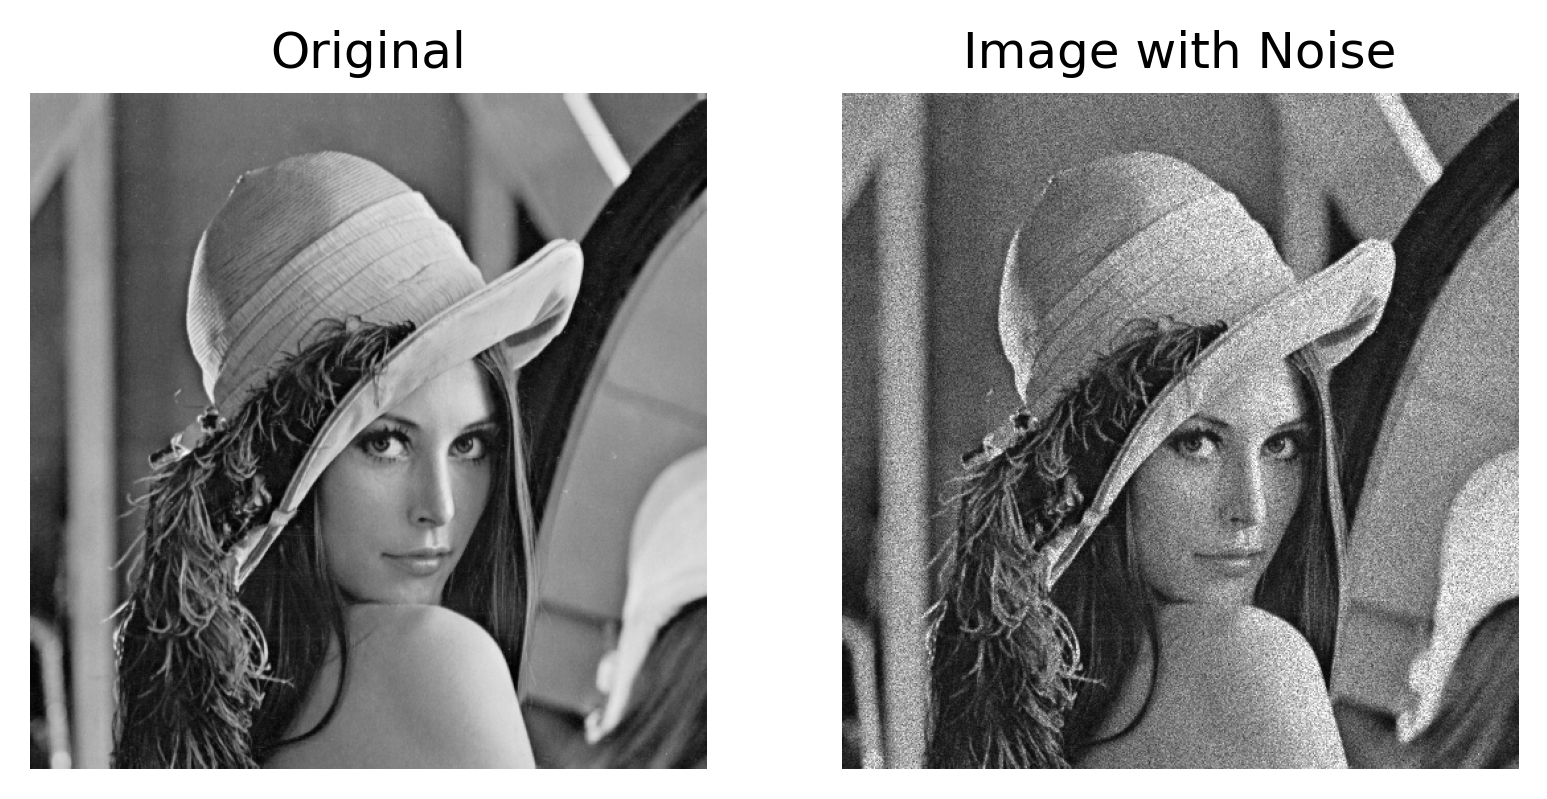

In [ ]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,2,1)
plt.imshow(imgOriginal,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,2,2)
plt.imshow(imgNoise,cmap='gray')
plt.axis("off")
plt.title("Image with Noise")

In [ ]:
#generate matrix transition 1d
"""
n is  cols of the matrix image
d: hiperparameter
v: hiperparameteir
"""
def computeMatrixTransition(n,d,v):
    P=np.zeros((n,n))
    for i in range(1,n-1):
        P[i-1,i]=d-(v/2)
        P[i,i]=1-2*d
        P[i+1,i]=d+(v/2)

    return P

"""
S is the matrix of Image
MT: Matrix of Probabilities
"""

def computeMatrixS(S,MT):
    for i in range(S.shape[0]):
        S[i] = np.matmul(S[i],MT)
    return S

"""
S(t+1) = S(t)*MT
"""

def removeNoise(MS,k,d,v):
    cols = MS.shape[1] #numbers of cols
    MT = computeMatrixTransition(cols,d,v)
    for t in range(k):
        MS = computeMatrixS(MS,MT)
        print(getRMSE(imgOriginal,MS))
    return MS


def getRMSE(Original,Denoising):
    mse = mean_squared_error(Original, Denoising)
    return mse

def getMAE(Original,Denoising):
    mae = mean_absolute_error(Original, Denoising)
    return mae

##
##---Histograms distribution
def visualizationHistogram(matrixGray,matrixGrayNoise,title1, title2):
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(6, 4),
                       facecolor="lightgrey")
 #sharex='col',sharey='row'
    histogramGray,bin_edgesGray = np.histogram(matrixGray.flatten(),bins=256)

    histogramGrayProb,bin_edgesGray = np.histogram(matrixGray.flatten(),bins=256)

    histogramGrayNoise,bin_edgesGrayNoise = np.histogram(matrixGrayNoise.flatten(),bins=256)
    histogramGrayNoiseProb,bin_edgesGrayNoise = np.histogram(matrixGrayNoise.flatten(),bins=256,density=True)

    ax[0,0].plot(bin_edgesGray[0:-1], histogramGray)
    ax[0,0].set(title=title1)
    ax[0,0].set_xlabel("Color Pixel")
    ax[0,0].set_ylabel("Frequency of Color Pixel")

    ax[1,0].plot(bin_edgesGray[0:-1], histogramGrayProb)

    ax[1,0].set_xlabel("Color Pixel")
    ax[1,0].set_ylabel("Probability density")




    ax[0,1].plot(bin_edgesGrayNoise[0:-1], histogramGrayNoise)
    ax[0,1].set(title=title2)
    ax[1,1].plot(bin_edgesGrayNoise[0:-1], histogramGrayNoiseProb)
    ax[1,1].set_xlabel("Color Pixel")



    plt.tight_layout()
    plt.show()


In [ ]:
imgS = imgNoise.copy()

In [ ]:
## Clean the image
imgResult=removeNoise(imgS,4,d,v)

0.004031687508507449
0.0035080967019885663
0.0036796460478626283
0.00389708600788215


In [ ]:
#io.imsave(pathDenoise,imgResult)

Text(0.5, 1.0, 'Denoising')

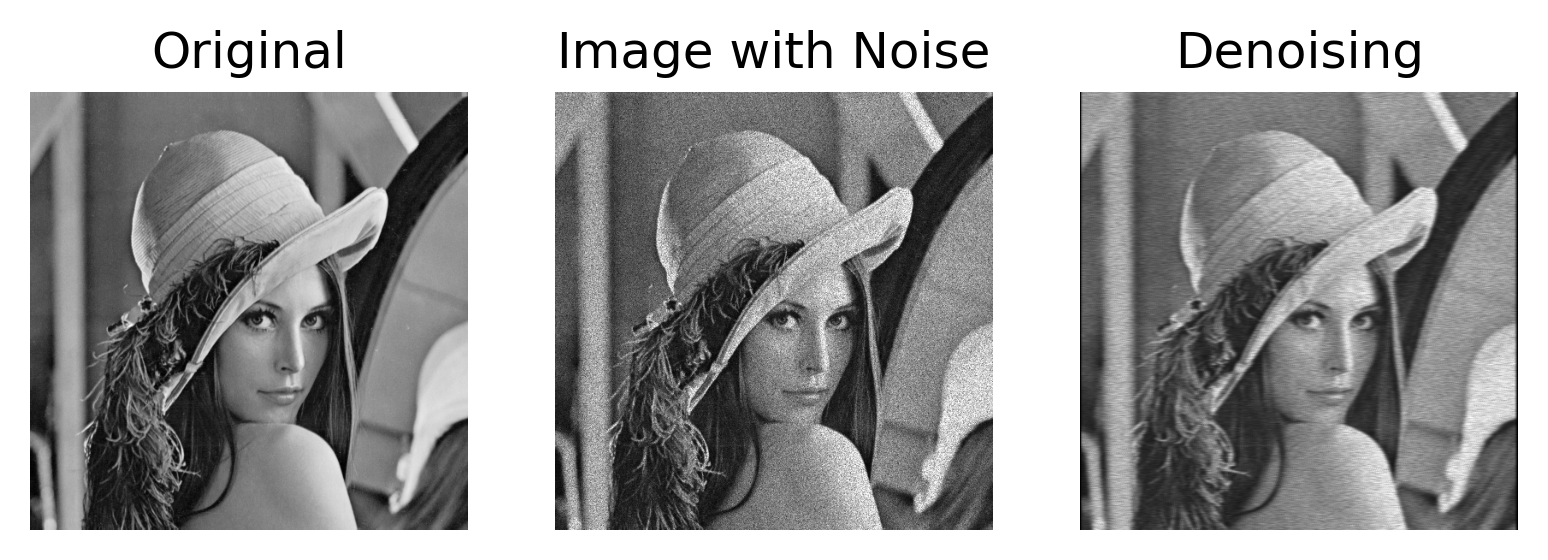

In [ ]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(imgOriginal,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(imgNoise,cmap='gray')
plt.axis("off")
plt.title("Image with Noise")

fig.add_subplot(1,3,3)
plt.imshow(imgResult,cmap='gray')
plt.axis("off")
plt.title("Denoising")

Equation

$Pixel[i,j]= 1-2*d$

$Pixel[i,j-1]= d-v/2$

$Pixel[i,j+1]= d+v/2$



## 2d Transition
----

$s(k;i,j)= \frac{1}{2}[ (d-v/2)*S(k;i,j-1)+(1-2d)*S(k;i,j)+(d+v/2)*S(k;i,j+1)]+\frac{1}{2}[(d-v/2)*S(k;i-1,j)+(1-2d)*S(k;i,j)+(d+v/2)*S(k;i+1,j)]$

In [ ]:
imageS2d= np.zeros(imgNoise.shape)
imageS2d=imgNoise.copy()

In [ ]:
## Compute S with 2-d Transition

for item in range(3):
    for i in range(imageS2d.shape[0]-1):
        for j in range (imageS2d.shape[1]-1):
            imageS2d[i,j]=(d/2-v/4)*imageS2d[i,j-1]+(1-2*d)*imageS2d[i,j]+(d/2+v/4)*imageS2d[i,j+1]+(d/2-v/4)*imageS2d[i-1,j]+(1-2*d)*imageS2d[i,j]+(d/2+v/4)*imageS2d[i+1,j]

    print(item,getRMSE(imgOriginal,imageS2d))


0 0.007328074967293646
1 0.02727159614110636
2 0.06895896284319436


Text(0.5, 1.0, 'Result 2-D')

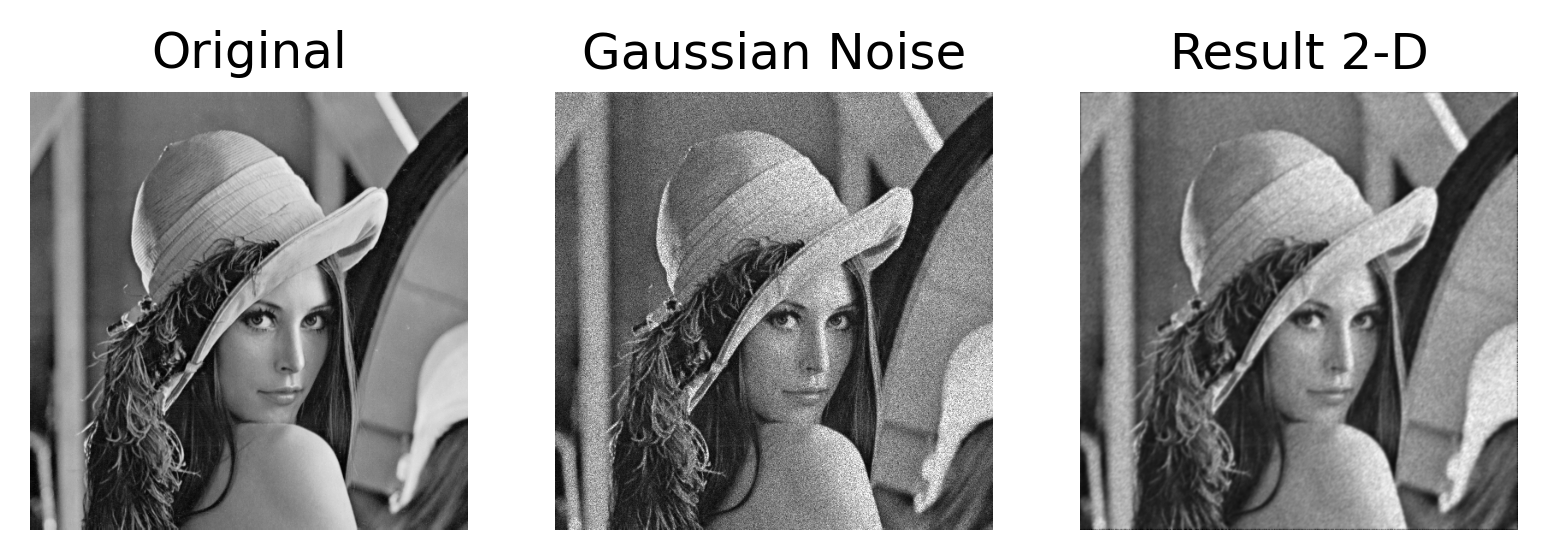

In [ ]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(imgOriginal,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(imgNoise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(imageS2d,cmap='gray')
plt.axis("off")
plt.title("Result 2-D")